In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            

(2, 200)
(1, 200)


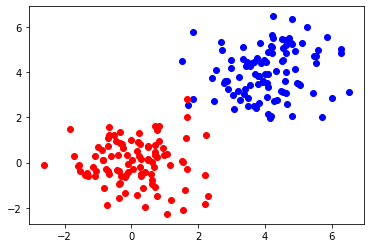

In [3]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')

print(X.shape)
print(y.shape)

X = X.T
y = y.T

In [4]:
class StochasticGradientDecent:
    def __init__(self, features, targets, cycles=15000, learning_rate=1e-5, batch_size=10, velocity=0.1, momentum=False, mu=0.01) -> None:
        self._features = features
        self._targets = targets
        self._cycles = cycles
        self._velocity = velocity
        self._learning_rate = learning_rate
        self._batch_size = batch_size
        self._momentum = momentum
        self._mu = mu
        
        self._weights = np.array([[1.1], [1.1]])
        self._intercept = 0
        self._X_batch = 0
        self._Y_batch = 0
        self._lossl = []
        self._velocity_interccpt = 0

    def shape_confirm(self):
        print("features")
        print(self._features.shape)

        print("targets")
        print(self._targets.shape)

        print('weights')
        print(self._weights.shape)

    def mini_batch(self):
        mini_batch = np.random.randint(0, X.shape[0], self._batch_size)

        self._X_batch = self._features[mini_batch, :]
        self._Y_batch = self._targets[mini_batch, :]

        return None

    def sgd(self):
        lossl = []
        for i in range(self._cycles):

            self.mini_batch()

            # Forward Pass

            z = self.linear(weights=self._weights,
                            features=self._X_batch, intercept=self._intercept)

            yhat = self.sigmoid(z)

            losses = self.loss(self._Y_batch, yhat)

            lossl.append(losses)

            # Backward Pass

            djdz = yhat - self._Y_batch
            djdw = djdz.T @ self._X_batch

            ones = np.ones(self._X_batch.shape[0])
            ones = ones.reshape(-1, 1)

            djdb = djdz.T @ ones

            # Update weights

            # self._weights -= self._learning_rate*djdw.T
            # self._intercept -= self._learning_rate*djdb.T


            # Momentum

            if self._momentum == False:
                self._weights -= self._learning_rate*djdw.T
                self._intercept -= self._learning_rate*djdb.T

            else:
                self._velocity = self._learning_rate * djdw + self._mu * self._velocity
                self._weights = self._weights
                self._intercept -= self._learning_rate*djdb.T

        return lossl

    def yhat(self):
        z = self.linear(self._weights, self._features, self._intercept)
        self._yhat = self.sigmoid(z)

        return self.sigmoid(z)

    def gradient_desent(self):
        lossl = []

        for i in range(self._cycles):

            # Forward Pass

            z = self.linear(weights=self._weights,
                            features=self._features, intercept=self._intercept)

            yhat = self.sigmoid(z)

            losses = self.loss(self._targets, yhat)

            lossl.append(losses)

            # Backward Pass

            djdz = yhat - self._targets
            djdw = djdz.T @ self._features

            ones = np.ones(self._features.shape[0])
            ones = ones.reshape(-1, 1)

            djdb = djdz.T @ ones

            # Update weights

            x = self._learning_rate*djdw

            self._weights -= self._learning_rate*djdw.T
            self._intercept -= self._learning_rate*djdb.T

        return lossl, yhat, self._weights

    def graphics(self):

        yhat = self.yhat()

        plt.figure()
        plt.subplot(121)
        plotClass(X.T, y.T, 'o')
        plt.subplot(122)
        plotClass(X.T, yhat.T > 0.5, 'x')

        # This I need to understand better.
        x1 = np.reshape(np.linspace(-2, 7, 2), (-1, 1))

        print(self._weights[0, 0])
        print(self._weights.shape)

        x2 = (- self._intercept - (self._weights[0, 0]*x1))/self._weights[1, 0]
        plt.plot(x1, x2)

    @staticmethod
    def plotClass(X, y, p):

        for i in range(y.shape[1]):
            if y[0, i] == 0:
                plt.plot(X[0, i], X[1, i], 'r'+p)
            else:
                plt.plot(X[0, i], X[1, i], 'b'+p)

    @staticmethod
    def sigmoid(z):
        return 1/(1 + np.exp(-z))

    @staticmethod
    def linear(weights, features, intercept):
        return features@weights + intercept

    @staticmethod
    def loss(y, yhat):
        return np.sum(-y * np.log(yhat)-(1-y)*np.log(1-yhat), axis=0)


In [5]:
Model = StochasticGradientDecent(X,y,cycles=100000,momentum=False,batch_size=15)
out = Model.gradient_desent()

1.4011723201537685
(2, 1)


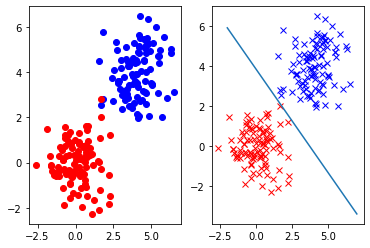

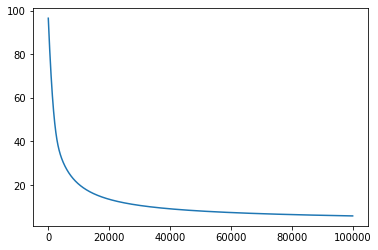

In [6]:
Model.graphics()

plt.figure()
plt.plot(out[0])


In [7]:
# Homework 2

(2, 200)
(1, 200)


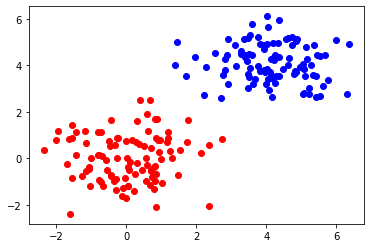

In [8]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')

print(X.shape)
print(y.shape)

X = X.T
y = y.T

In [9]:
Model_2 = StochasticGradientDecent(X,y,cycles=150000,momentum=False,batch_size=75)

out_2 = Model_2.sgd()

1.026962368886177
(2, 1)


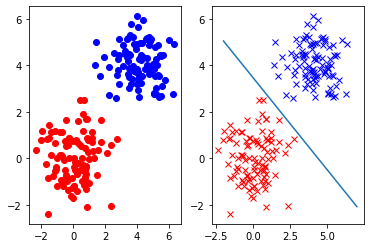

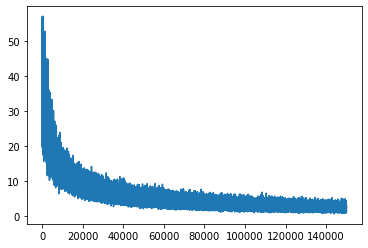

In [10]:
Model_2.graphics()

plt.figure()
plt.plot(out_2)

(2, 200)
(1, 200)


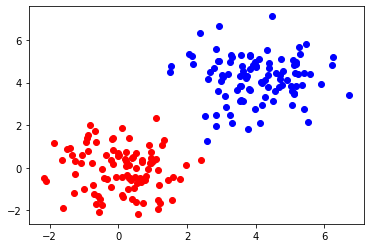

In [11]:
# SGD with Momentum

num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')

print(X.shape)
print(y.shape)

X = X.T
y = y.T

1.1
(2, 1)


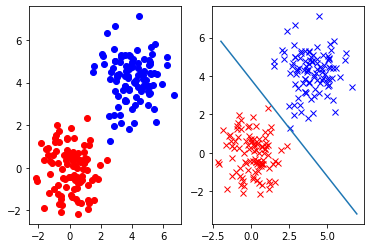

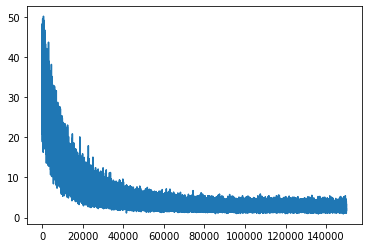

In [12]:
Model_3 = StochasticGradientDecent(X,y,cycles=150000,momentum=True,batch_size=75)

out_3 = Model_3.sgd()

Model_3.graphics()

plt.figure()
plt.plot(out_3)